In [1]:
#подключим модуль Pandas. Он нужен, чтобы работать с данными
import pandas
import numpy as np
import matplotlib.pyplot as plt
#загрузим библиотеку
import matplotlib.pyplot as plt #загрузить библиотеку matplotlib.pyplot под именем plt
%matplotlib inline

In [2]:
# загрузим набор данных
data = pandas.read_csv("IRIS.csv")

In [3]:
# посмотрим нашу таблицу
data[:10]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


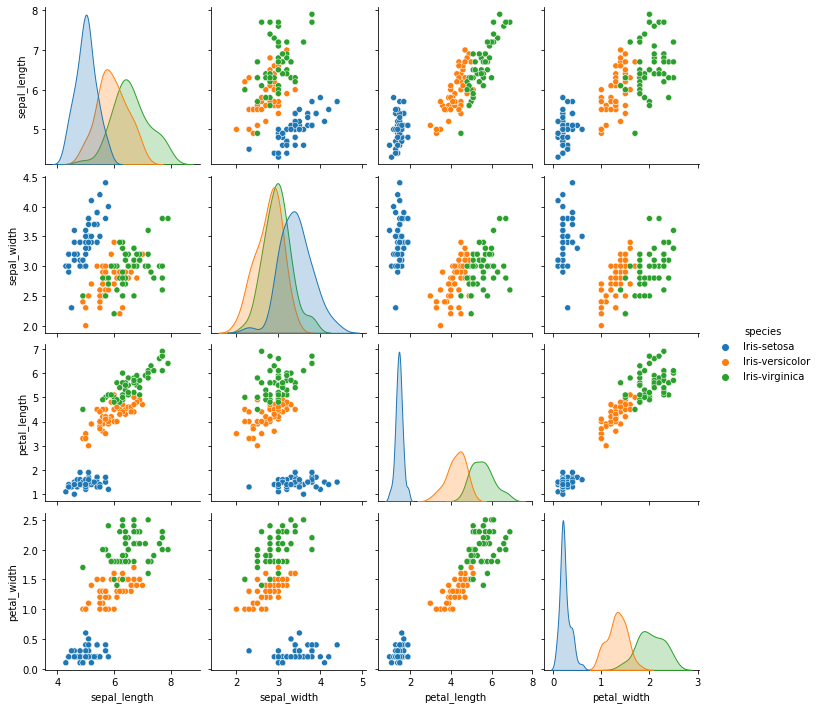

In [ ]:
import seaborn as sns
sns.pairplot(data , hue='species')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Нас не устраивает, что категория species не цифровая. с таким работать будет не возможно. нейросети умеют работать только с цифрами
# поэтому мы категории из буквенных значений трансоврмируем в цифровые.

# загрузим функцию для этого 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()# загрузили его в переменную для работы с ним. (на самом деле инстанцировали)

# выберем колонки, которые нам не подходят
object_cols = ['species']# список с названиями тех колонок, которые мы хотим из текстовых категорий трансформировать в цифровые

# тоже самое, но автоматически
# object_cols = [col for col in data.columns if data[col].dtype == "object"]


for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])# применяем функцию к колонкам

#выведем данные и заметим, что категория вида поменялась на цифры
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [ ]:
#тип данных теперь тоже числовой
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# нормализуем данные 
from sklearn import preprocessing

x = data.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataproceesed = pandas.DataFrame(x_scaled)

In [ ]:
# # разделение на тестовую выборку и тренировочную в лоб
from sklearn.utils import shuffle


def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = split_train_test(dataproceesed, 0.2)
print(len(train_set), "train +", len(test_set), "test")

120 train + 30 test


In [ ]:
dataproceesed[0:3]

,0,1,2,3,4
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0


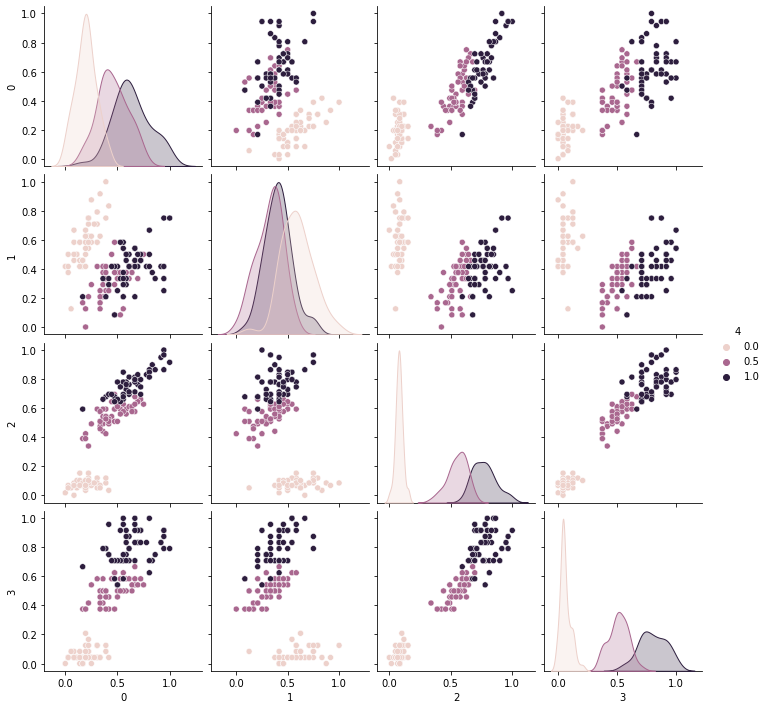

In [ ]:
sns.pairplot(dataproceesed , hue=4)

In [17]:
# делим каждый на лэйблы и фичи
columns = list(dataproceesed)
print(columns)
columns.pop(-1)
print(columns)

[0, 1, 2, 3, 4]
[0, 1, 2, 3]


In [36]:
train_set_labeles = train_set[4]
train_set_features = train_set.loc[:, columns]

test_set_labeles = test_set[4]
test_set_features = test_set.loc[:, columns]

test_set_features.head(3)

,0,1,2,3
7,0.194444,0.583333,0.084746,0.041667
48,0.277778,0.708333,0.084746,0.041667
98,0.222222,0.208333,0.338983,0.416667


In [37]:
train_set_labeles.head(3)

22    0.0
67    0.5
33    0.0
Name: 4, dtype: float64

In [38]:
# строим линейную модель
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_features, train_set_labeles)

LinearRegression()

In [39]:
# проверка на тренировочной выборке
from sklearn.metrics import mean_squared_error


predictions = lin_reg.predict(train_set_features)
lin_mse = mean_squared_error(train_set_labeles, predictions)
lin_rmse = np.sqrt(lin_mse)



# проверка на тестовой выборке

predictions2 = lin_reg.predict(test_set_features)
lin_mse2 = mean_squared_error(test_set_labeles, predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("ошибка на тренировочном датасете: ",lin_rmse*100,"%\n","ошибка на тестовом датасете: ",lin_rmse2*100,"%")

ошибка на тренировочном датасете:  11.10622521680955 %
 ошибка на тестовом датасете:  9.864220948086508 %
